In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Salary_Data.csv")
data
     

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.info


<bound method DataFrame.info of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0>

In [4]:
data.shape

(30, 2)

In [5]:
data.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


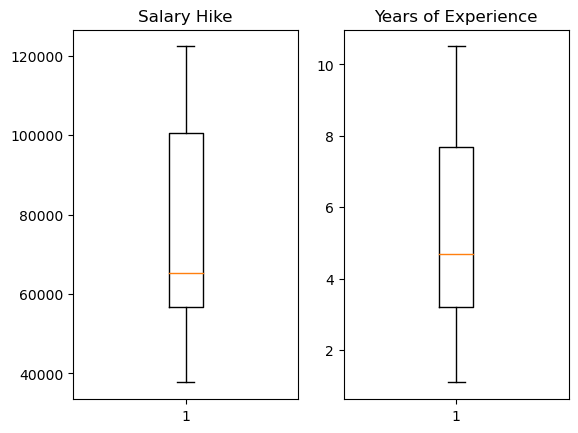

In [7]:
#Plotting the data to check for outliers
plt.subplot(121)
plt.boxplot(data['Salary'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(data['YearsExperience'])
plt.title('Years of Experience')
plt.show()


In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


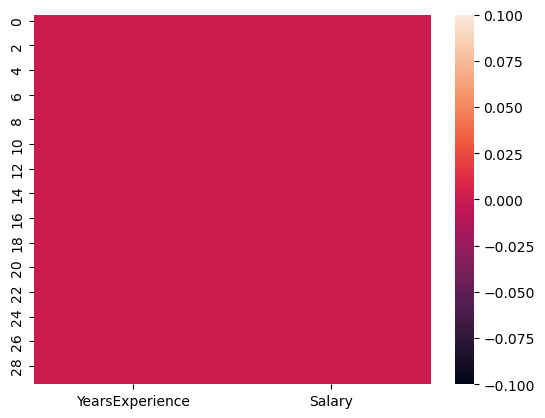

In [9]:
sns.heatmap(data.isnull())
plt.show()

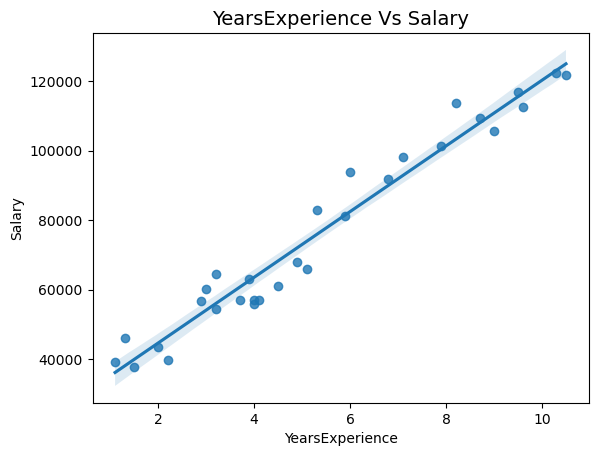

In [17]:
# Visualization of Correlation beteen x and y
sns.regplot(x=data['YearsExperience'], y=data['Salary'])
plt.title('YearsExperience Vs Salary', fontsize = 14)
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

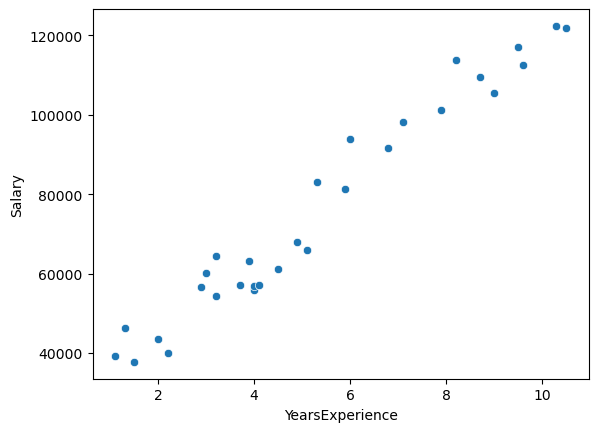

In [18]:
sns.scatterplot(x=data['YearsExperience'],y=data['Salary'])


In [19]:
data.var()

YearsExperience    8.053609e+00
Salary             7.515510e+08
dtype: float64

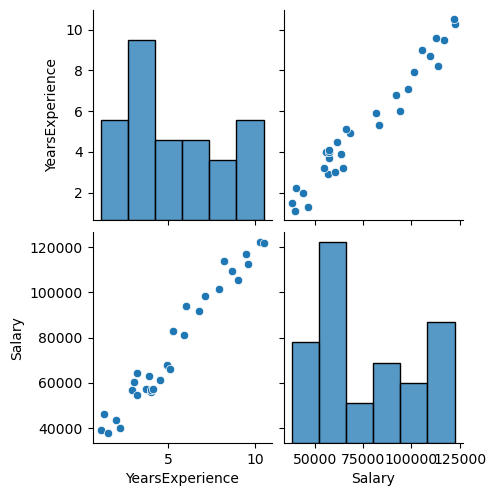

In [20]:
sns.pairplot(data)

<Axes: >

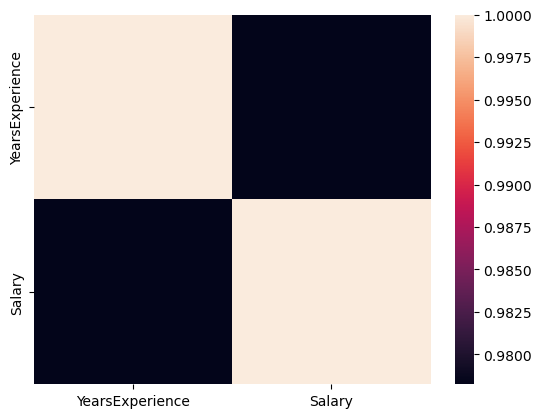

In [21]:
sns.heatmap(data.corr())

<Axes: xlabel='YearsExperience', ylabel='Density'>

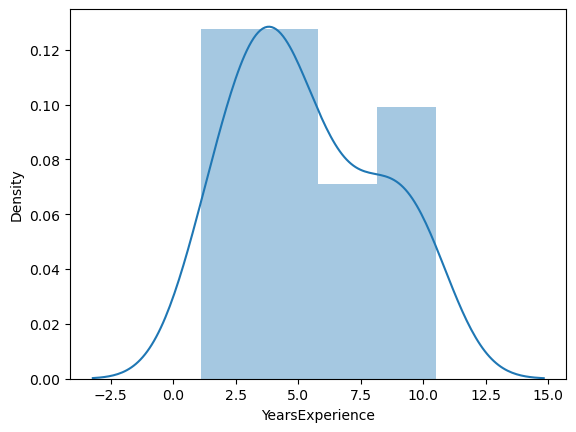

In [22]:
sns.distplot(data['YearsExperience'])

<Axes: xlabel='Salary', ylabel='Density'>

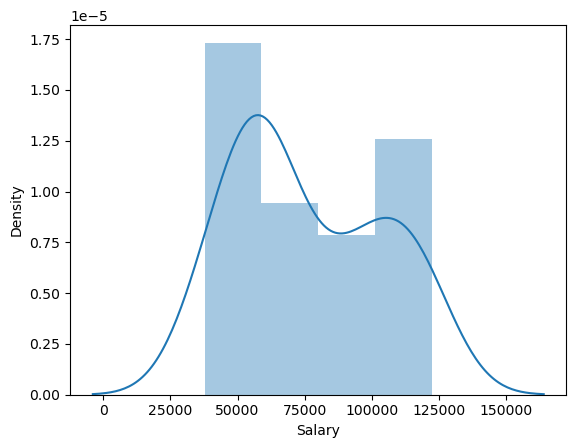

In [23]:
sns.distplot(data['Salary'])

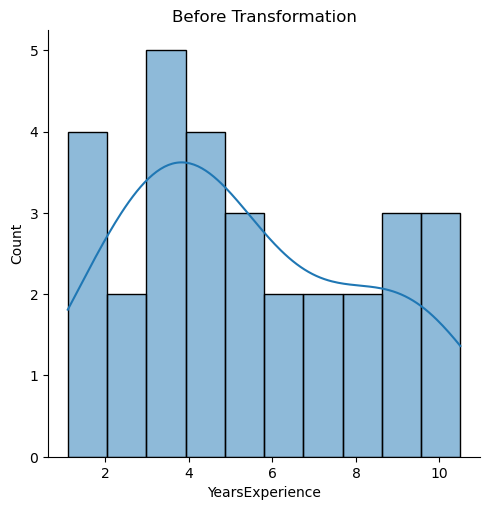

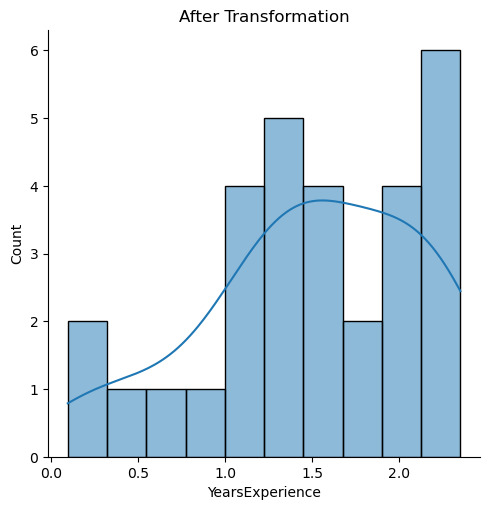

In [24]:
# Trying different transformation of data to estimate normal distribution and remove any skewness
sns.displot(data['YearsExperience'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

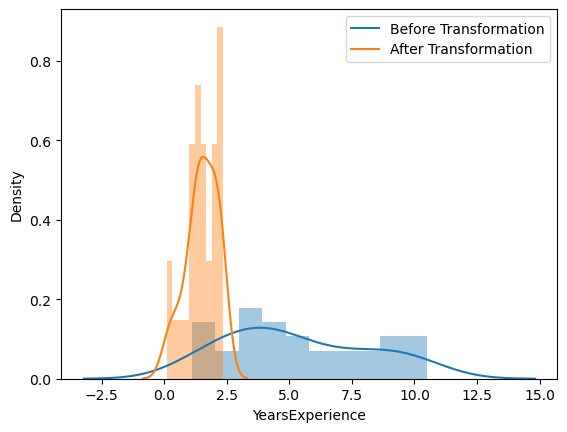

In [25]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['YearsExperience'], bins = 10, kde = True)
sns.distplot(np.log(data['YearsExperience']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

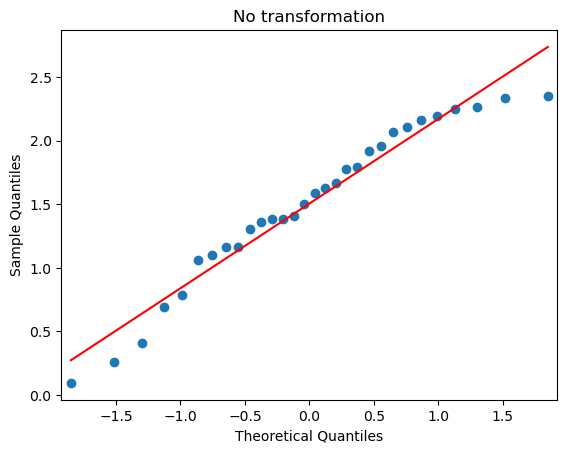

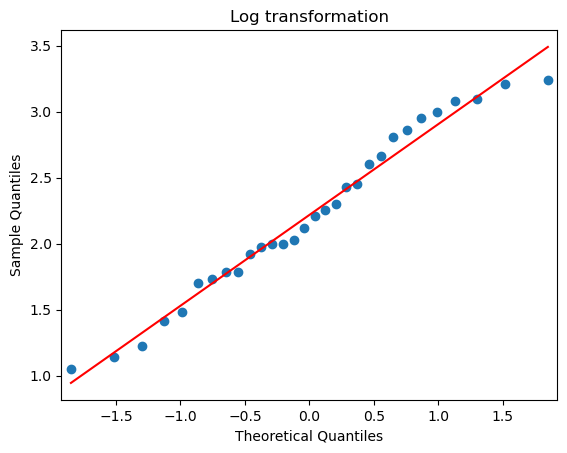

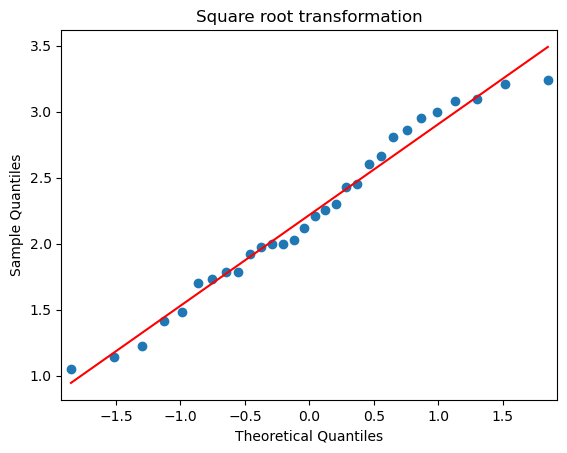

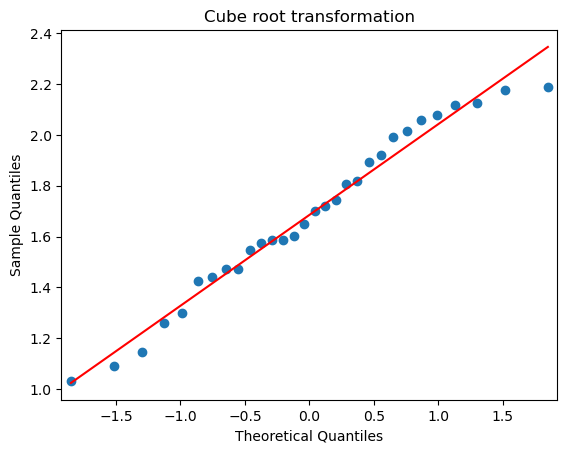

In [26]:
sm.qqplot(np.log(data['YearsExperience']), line = 'r')
plt.title('No transformation')
sm.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(data['YearsExperience']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(data['YearsExperience']), line = 'r')
plt.title('Cube root transformation')
plt.show()

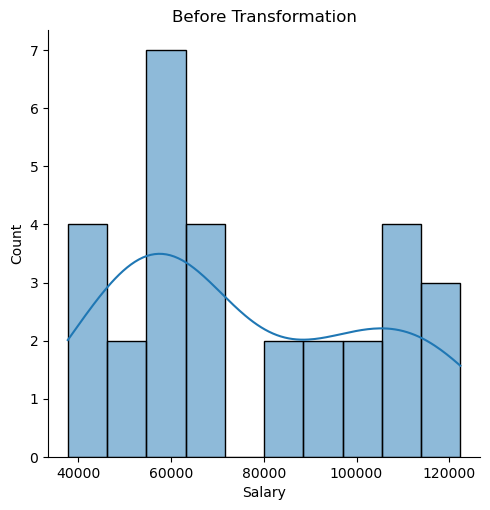

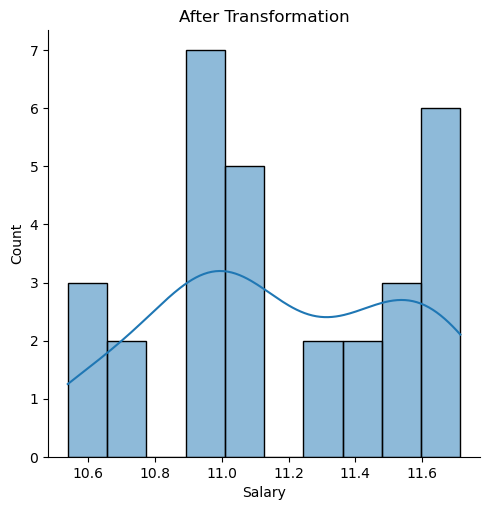

In [27]:
sns.displot(data['Salary'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

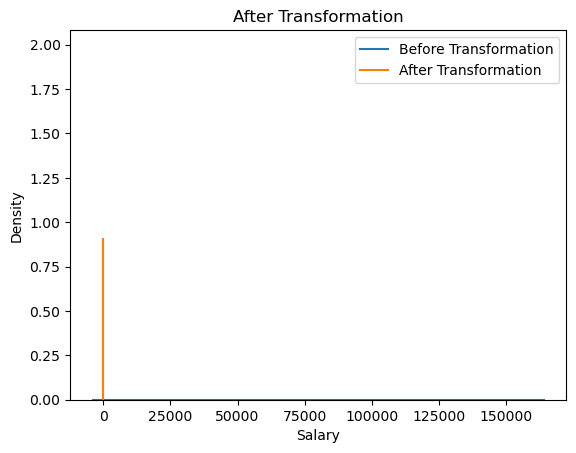

In [28]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Salary'], bins = 10, kde = True)
sns.distplot(np.log(data['Salary']), bins = 10, kde = True)
plt.title('After Transformation')
plt.legend(labels)
plt.show()

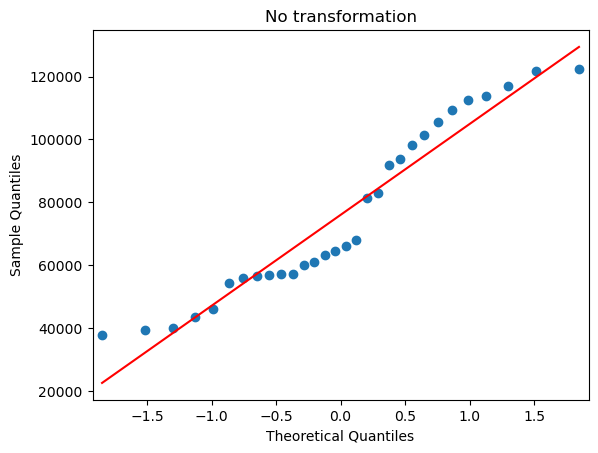

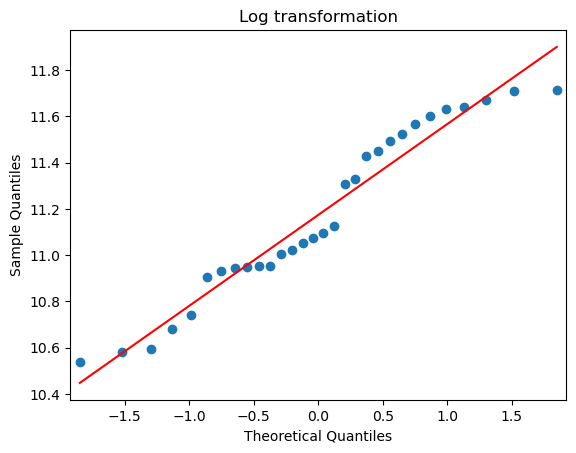

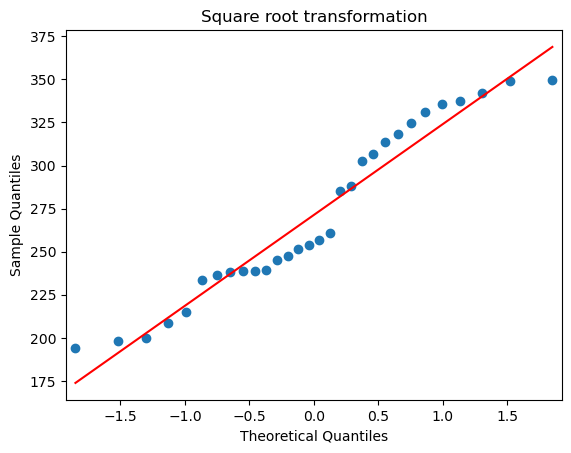

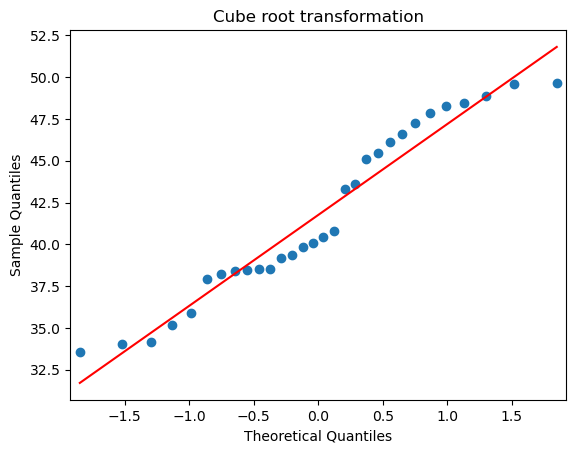

In [29]:
sm.qqplot(data['Salary'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(data['Salary']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(data['Salary']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(data['Salary']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [42]:
# Fitting a Linear Regression Model
#Using Ordinary Least Squares (OLS) regression

linear_model=smf.ols("Salary~YearsExperience", data).fit()

In [43]:
print('R-squared     :',linear_model.rsquared.round(3)) #Overall Contribution of Predictors
print('Adj.R-squared :',linear_model.rsquared_adj.round(3)) #Overall Contribution of Predictors
print('AIC Value     :',linear_model.aic.round(3)) #Error Impurity
print('BIC Value     :',linear_model.bic.round(3)) #Error Impurity

R-squared     : 0.957
Adj.R-squared : 0.955
AIC Value     : 606.882
BIC Value     : 609.685


In [44]:
#Square Root transformation on data
linear_model1 = smf.ols('np.sqrt(Salary)~np.sqrt(YearsExperience)', data).fit()

In [45]:
print('R-squared     :',linear_model1.rsquared.round(3))
print('Adj.R-squared :',linear_model1.rsquared_adj.round(3))
print('AIC Value     :',linear_model1.aic.round(3))

R-squared     : 0.942
Adj.R-squared : 0.94
AIC Value     : 237.046


In [46]:
# Cube Root transformation on data
linear_model2 = smf.ols('np.cbrt(Salary)~np.cbrt(YearsExperience)', data).fit()

In [47]:
print('R-squared     :',linear_model2.rsquared.round(3))
print('Adj.R-squared :',linear_model2.rsquared_adj.round(3))
print('AIC Value     :',linear_model2.aic.round(3))
print('BIC Value     :',linear_model2.bic.round(3))

R-squared     : 0.932
Adj.R-squared : 0.93
AIC Value     : 105.179
BIC Value     : 107.981


In [48]:
# Log transformation on data
linear_model3 = smf.ols('np.log(Salary)~np.log(YearsExperience)', data).fit()

In [49]:
print('R-squared     :',linear_model3.rsquared.round(3))
print('Adj.R-squared :',linear_model3.rsquared_adj.round(3))
print('AIC Value     :',linear_model3.aic.round(3))
print('BIC Value     :',linear_model3.bic.round(3))

R-squared     : 0.905
Adj.R-squared : 0.902
AIC Value     : -42.417
BIC Value     : -39.615


In [50]:
# Model Testing
#Finding Coefficient Parameters (Beta0 and Beta1 values)
linear_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [51]:
print(linear_model.tvalues,'\n',linear_model.pvalues)


Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [52]:
linear_model.rsquared, linear_model.rsquared_adj


(0.9569566641435086, 0.9554194021486339)

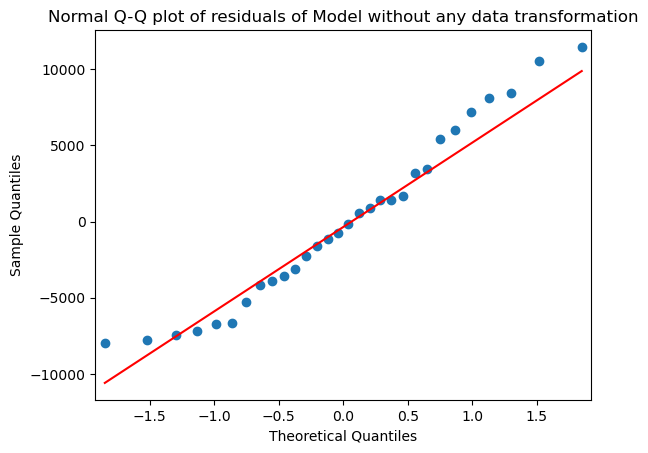

In [53]:
# Residual Analysis
#Test for Normality of Residuals (Q-Q Plot)
sm.qqplot(linear_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

In [54]:
#Residual Plot to check Homoscedasticity or Hetroscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

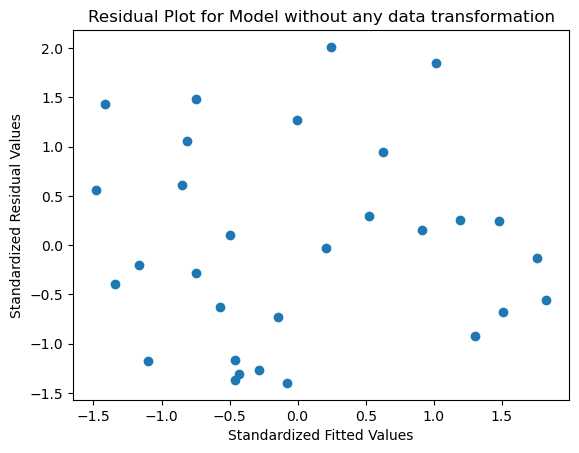

In [55]:
plt.scatter(get_standardized_values(linear_model.fittedvalues), get_standardized_values(linear_model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [57]:
# Model Validation
#Comparing different models with respect to the Root Mean Squared Errors

from sklearn.metrics import mean_squared_error
linear_model1_pred_y =np.square(linear_model1.predict(data['YearsExperience']))
linear_model2_pred_y =pow(linear_model2.predict(data['YearsExperience']),3)
linear_model3_pred_y =np.exp(linear_model3.predict(data['YearsExperience']))

In [58]:
linear_model1_rmse =np.sqrt(mean_squared_error(data['Salary'], linear_model1_pred_y))
linear_model2_rmse =np.sqrt(mean_squared_error(data['Salary'], linear_model2_pred_y))
linear_model3_rmse =np.sqrt(mean_squared_error(data['Salary'], linear_model3_pred_y))
print('Linear Model =', np.sqrt(linear_model.mse_resid),'\n' 'Linear Model1=', linear_model1_rmse,'\n' 'Linear Model2=', linear_model2_rmse,'\n' 'Linear Model3=', linear_model3_rmse)


Linear Model = 5788.315051119395 
Linear Model1= 5960.64709617431 
Linear Model2= 6232.815455835842 
Linear Model3= 7219.716974372806


In [59]:
rmse = {'Linear Model': np.sqrt(linear_model.mse_resid), 'Linear Model1': linear_model1_rmse, 'Linear Model2': linear_model3_rmse, 'Linear Model3' : linear_model3_rmse}
min(rmse, key=rmse.get)

'Linear Model'

In [60]:
#Predicting values
#First model results without any transformation
predicted = pd.DataFrame()
predicted['YearsExperience'] = data.YearsExperience
predicted['Salary'] = data.Salary
predicted['Predicted_Salary_Hike'] = pd.DataFrame(linear_model.predict(predicted.YearsExperience))
predicted

,YearsExperience,Salary,Predicted_Salary_Hike
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
